## Logistic Regression

### I studied logistic regression as a pumpkin database in order to predict

In [2]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


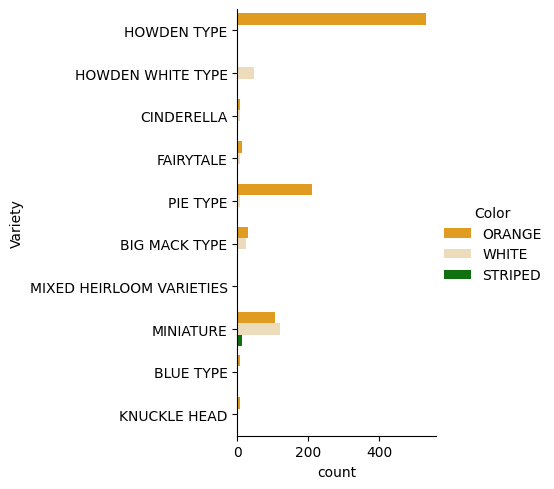

In [3]:
import seaborn as sns

palette = {"ORANGE" : "orange", "WHITE" : "wheat", 'STRIPED' : 'green'}

sns.catplot(data=full_pumpkins, y="Variety", hue="Color", kind="count", palette=palette)

In [4]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [5]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [6]:
cols_to_use = ordinal_features + categorical_features

full_pumpkins.dropna(subset=cols_to_use, inplace=True)

In [7]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ("ord", ordinal_encoder, ordinal_features),
    ("cat", categorical_encoder, categorical_features)])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(full_pumpkins)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(full_pumpkins['Color'])

In [9]:
encoded_full_pumpkins = encoded_features.assign(Color=encoded_label)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6660\1180120423.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


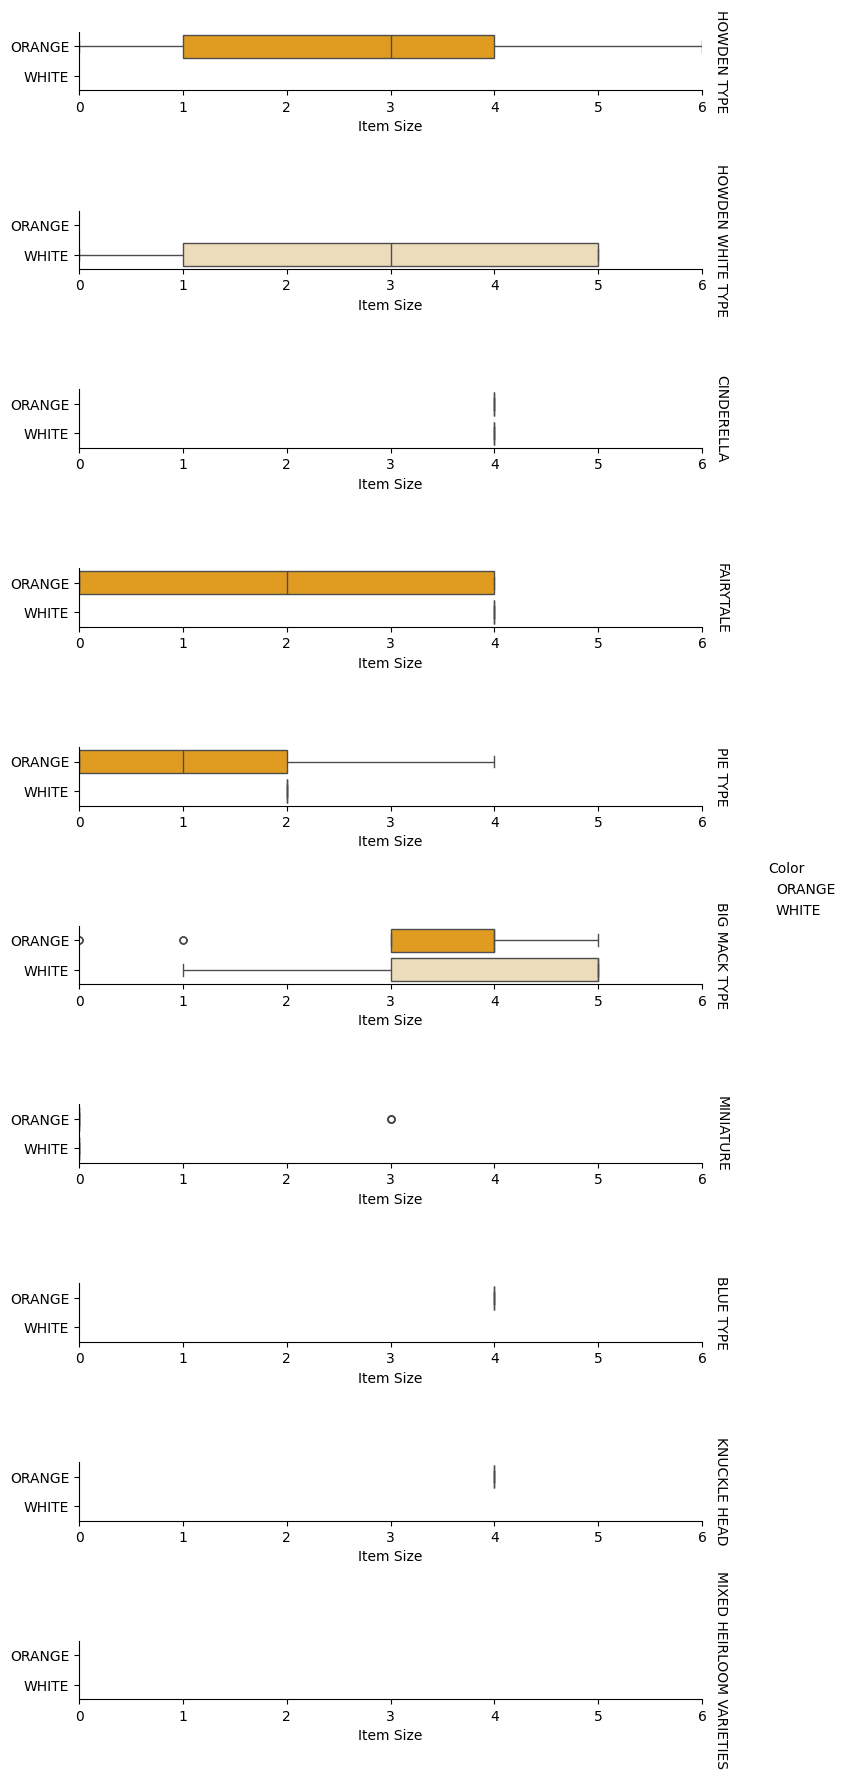

In [10]:
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
'STRIPED' : 'gold'
}
full_pumpkins['Item Size'] = encoded_full_pumpkins['ord__Item Size']

g = sns.catplot(
    data=full_pumpkins,
       x="Item Size", y="Color", row='Variety',
       kind="box", orient="h",
       sharex=False, margin_titles=True,
       height=1.8, aspect=4, palette=palette,
   )
g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


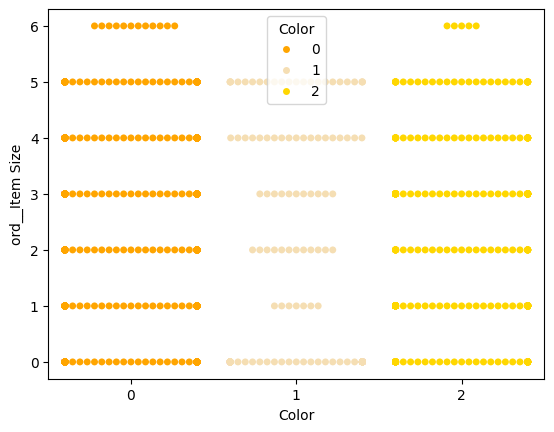

In [11]:
palette = {
0 : 'orange',
1 : 'wheat',
2 : 'gold'
}
sns.swarmplot(data=encoded_full_pumpkins, x="Color", y="ord__Item Size", hue="Color", palette=palette)

In [12]:
from sklearn.model_selection import train_test_split

X = encoded_full_pumpkins[encoded_full_pumpkins.columns.difference(['Color'])]
y = encoded_full_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [13]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions, average='micro'))
print('F1-score: ', f1_score(y_test, predictions, average='macro'))
print('F1-score: ', f1_score(y_test, predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       163
           1       0.91      0.62      0.74        34
           2       0.89      0.97      0.93        97

    accuracy                           0.92       294
   macro avg       0.91      0.85      0.87       294
weighted avg       0.92      0.92      0.91       294

Predicted labels:  [0 0 0 0 2 0 2 1 2 1 0 0 2 0 1 0 0 2 0 2 0 2 2 0 2 0 2 0 0 0 1 0 0 2 2 0 1
 2 1 0 2 0 0 0 2 2 0 2 2 2 2 0 0 2 0 0 0 0 2 2 2 0 0 0 2 2 2 0 0 2 2 0 0 2
 0 2 0 2 1 2 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 0 2 0 2 2 0 2 0 2 0 0 0 0 1 1 1 0 2 2 0 0 0 0 0 0 0 0
 2 1 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0 1 2 2 0 2 2 2 2 0 0 2 2 2 0 0 1 0 2
 0 0 2 0 2 0 2 0 1 1 2 1 2 0 0 0 2 0 2 1 2 0 0 0 0 0 2 2 2 0 0 0 0 2 0 1 0
 2 0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 2 2 0 0 2 0 2 2 2 0 2 0 2 2 1 1 0 2 2
 0 2 2 0 0 0 1 0 0 0 0 0 2 0 2 0 0 2 2 1 0 0 2 0 2 0 0 2 1 2 0 0 0 0 0]
F1-

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[155,   1,   7],
       [  8,  21,   5],
       [  2,   1,  94]])

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)

In [16]:
auc = roc_auc_score(y_test,y_scores, multi_class='ovo')
auc = roc_auc_score(y_test,y_scores, multi_class='ovr')
print(auc)

0.9864573979073242
